In [1]:
# In[428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

plt.rcParams['figure.figsize'] = 9,7


In [2]:
def plot_data(X,samples,labels):
	'''''Plots data distribution with two classes
		X : Data as numpy array
		samples : number of samples that the data contains (int)
		labels : numpy array with labels each data data sample'''
	x0 = [i for i in range(0,samples) if(labels[0,i] == 0)]
	x1 = [i for i in range(0,samples) if(labels[0,i] == 1)]
	plt.scatter(X[0,x0],X[1,x0],s=5, color = 'red', label = 'class 0',marker='*')
	plt.scatter(X[0,x1],X[1,x1],s=2, color = 'blue', label = 'class 1',marker='o')
	plt.title("Actual data distribution")
	plt.xlabel("Feature x1")
	plt.ylabel("Feature x2")
	plt.legend()
	# plt.show()

In [3]:
def Generate_and_Plot_data(samples):
	# Labels
	labels = np.zeros((2,samples))
	labels[0,:] = (np.random.uniform(0,1,samples) >= prior[0]).astype(int)
	# Data
	X = np.zeros((2,samples))
	for i in range(0,samples):
		if(labels[0,i] == 0):
			X[:,i] = np.random.multivariate_normal(mean[:,0],cov[:,:,0],1)
		else:
			X[:,i] = np.random.multivariate_normal(mean[:,1],cov[:,:,1],1)
	plot_data(X,samples,labels)
	return X,labels

In [4]:

def roc_plt(X, labels,samples):
	class0_count = float(list(labels[0,:]).count(0)) # number of samples for class 0
	class1_count = float(list(labels[0,:]).count(1)) # number of samples for class 1
	fpr =[] # false positive rate array
	tpr = [] # true positive rate array
	minPerror = [] # false positive rate array
	# Creare list of threhold values for plotting ROC curve
	q = list(sorted(X[0,:]))
	gamma_list = []
	for i in range(0,samples-1):
		gamma_list.append((q[i] + q[i+1])/2.0)
		gamma_list = [gamma_list[i] for i in range(0,len(gamma_list)) if gamma_list[i]>=0]
	
	# Calculate the discriminant score
	logValpdf1 = np.log(multivariate_normal.pdf(X.T,mean=mean[:,1], cov = cov[:,:,1]))
	logValpdf0 = np.log(multivariate_normal.pdf(X.T,mean = mean[:,0],cov = cov[:,:,0]))
	discriminant_score = logValpdf1 - logValpdf0
	
	# Code to plot ROC curve
	# # Calculate probability of minimum error for all values in gamma_list
	# for gamma in gamma_list:
	# labels[1,:] = (discriminant_score >= np.log(gamma)).astype(int)
	# x00 = [i for i in range(labels.shape[1]) if (labels[1,i] == 0 and labe
	# x01 = [i for i in range(labels.shape[1]) if (labels[1,i] == 0 and labe
	# x10 = [i for i in range(labels.shape[1]) if (labels[1,i] == 1 and labe
	# x11 = [i for i in range(labels.shape[1]) if (labels[1,i] == 1 and labe
	# fpr.append(len(x10)/class0_count)
	# tpr.append(len(x11)/class1_count)
	# minPerror.append(1 - ((len(x00)+len(x11))/10000.0))
	# # Plot the ROC curve
	# plt.plot(fpr,tpr,color = 'red' )
	# plt.plot(fpr[np.argmin(minPerror)],tpr[np.argmin(minPerror)],'*',color = '
	# plt.xlabel('FPR')
	# plt.ylabel('TPR')
	# plt.title('ROC Curve')
	# plt.annotate(s='Min_P(e) = ' + str(round(minPerror[np.argmin(minPerror)],3
	# +'TPR = '+ str(round(tpr[np.argmin(minPerror)],2)) + '\n'
	# +'FPR = '+ str(round(fpr[np.argmin(minPerror)],2)) + '\n'
	# +'Gamma = '+ str(round(gamma_list[np.argmin(minPerror)],2)),xy =(f
	# xytext=(fpr[np.argmin(minPerror)]+0.3,tpr[np.argmin(minPerror)]),
	# arrowprops=dict(facecolor='black', width = 0.01,headwidth = 5,shr
	# plt.show()

	# Code to plot the distribution after Classification
	labels[1,:] = (discriminant_score >= np.log(9)).astype(int)
	x00 = [i for i in range(labels.shape[1]) if (labels[0,i] == 0 and labels[1,i] == 0)]
	x01 = [i for i in range(labels.shape[1]) if (labels[0,i] == 0 and labels[1,i] == 1)]
	x10 = [i for i in range(labels.shape[1]) if (labels[0,i] == 1 and labels[1,i] == 0)]
	x11 = [i for i in range(labels.shape[1]) if (labels[0,i] == 1 and labels[1,i] == 1)]
	plt.plot(X[0,x00],X[1,x00],'.',color ='g', markersize = 6)
	plt.plot(X[0,x01],X[1,x01],'.',color = 'r', markersize = 6)
	plt.plot(X[0,x11],X[1,x11],'+',color ='g', markersize = 6)
	plt.plot(X[0,x10],X[1,x10],'+',color = 'r', markersize = 6)
	plt.legend(["class 0 correctly classified",'class 0 wrongly classified','class 1 correctly classified','class 1 wrongly classified'])
	plt.xlabel("Feature x1")
	plt.ylabel("Feature x2")
	plt.title('Distribution after classification overlapped by decision boundaries')

	horizontalGrid = np.linspace(np.floor(min(X[0,:])),np.ceil(max(X[0,:])),100)
	verticalGrid = np.linspace(np.floor(min(X[1,:])),np.ceil(max(X[1,:])),100);
	dsg = np.zeros((100,100))
	a = np.array(np.meshgrid(horizontalGrid,verticalGrid))
	for i in range(100):
		for j in range(100):
			p = multivariate_normal.pdf(np.array([a[0][i][j], a[1][i][j]]),mean=mean[:,1], cov = cov[:,:,1])
			q = multivariate_normal.pdf(np.array([a[0][i][j], a[1][i][j]]),mean=mean[:,0], cov = cov[:,:,0])
			dsg[i][j] = np.log(p) - np.log(q) - np.log(9)
	plt.contour(a[0],a[1],dsg)
	plt.show()




In [9]:
def find_theta(train_data,alpha,iterations,train_labels,test_data, type_ = 'l'):
	if(type_ == 'l'):
		z = np.c_[np.ones((train_data.shape[1])),train_data.T].T
		w = np.zeros((3,1))
	else:
		z = np.c_[np.ones((train_data.shape[1])),train_data[0],train_data[1],train_data[0]*train_data[0],train_data[0]*train_data[1], train_data[1]*train_data[1]].T
		w = np.zeros((6,1))

	for i in range(iterations):
		h = 1/ (1+ np.exp(-(np.dot(w.T,z))))
		cost_gradient = (1/float(z.shape[1])) * np.dot(z,(h-train_labels[0]).T)
		w = w - alpha*cost_gradient

	if(type_ == 'l'):
		z = np.c_[np.ones((test_data.shape[1])),test_data.T].T
	else:
		z = np.c_[np.ones((test_data.shape[1])),test_data[0],test_data[1],test_data[0]*test_data[0],test_data[0]*test_data[1], test_data[1]*test_data[1]].T

	decisions = np.zeros((1,test_data.shape[1]))
	h = 1/ (1+np.exp(-(np.dot(w.T,z))))
	decisions[0,:] = (h[0,:]>=0.5).astype(int)
	return(w,decisions)

In [10]:
def plot_boundary(labels):
	'''''Function to plot decision boundaries superimposed on data'''
	X = D_test10000
	# z = np.c_[np.ones((train_data.shape[1])),train_data.T].T
	# h = 1/ (1+np.exp(-(np.dot(w100.T,z))))
	# decisions[0,:] = (h[0,:]>=0.5).astype(int)
	x00 = [i for i in range(labels.shape[1]) if (labels[0,i] == 0 and labels[1,i] == 0)]
	x01 = [i for i in range(labels.shape[1]) if (labels[0,i] == 0 and labels[1,i] == 1)]
	x10 = [i for i in range(labels.shape[1]) if (labels[0,i] == 1 and labels[1,i] == 0)]
	x11 = [i for i in range(labels.shape[1]) if (labels[0,i] == 1 and labels[1,i] == 1)]

	plt.plot(X[0,x00],X[1,x00],'.',color ='g', markersize = 6)
	plt.plot(X[0,x01],X[1,x01],'.',color = 'r', markersize = 6)
	plt.plot(X[0,x11],X[1,x11],'+',color ='g', markersize = 6)
	plt.plot(X[0,x10],X[1,x10],'+',color = 'r', markersize = 6)
	plt.legend(["class 0 correctly classified",'class 0 wrongly classified','class 1 correctly classified','class 1 wrongly classified'])
	plt.xlabel("Feature x1")
	plt.ylabel("Feature x2")
	plt.title('Distribution after classification overlapped by decision boundaries')

	# plot_data(X,10,labels_10)
	horizontalGrid = np.linspace(np.floor(min(X[0,:])),np.ceil(max(X[0,:])),100);
	verticalGrid = np.linspace(np.floor(min(X[1,:])),np.ceil(max(X[1,:])),100);

	dsg = np.zeros((100,100))
	a = np.array(np.meshgrid(horizontalGrid,verticalGrid))
	for i in range(100):
		for j in range(100):
			x1 = a[0][i][j]
			x2 = a[1][i][j]
			z = np.c_[1,x1,x2].T
			# z = np.c_[1,x1,x2,pow(x1,2),x1*x2,pow(x2,2)].T
			dsg[i][j] = np.sum(np.dot(w_10.T,z))
	plt.contour(a[0],a[1],dsg, levels = [0])
	plt.show()





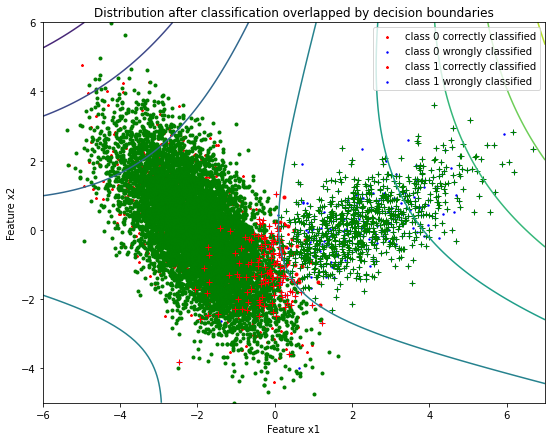

4.900000000000006
1.9000000000000057
1.7600000000000051


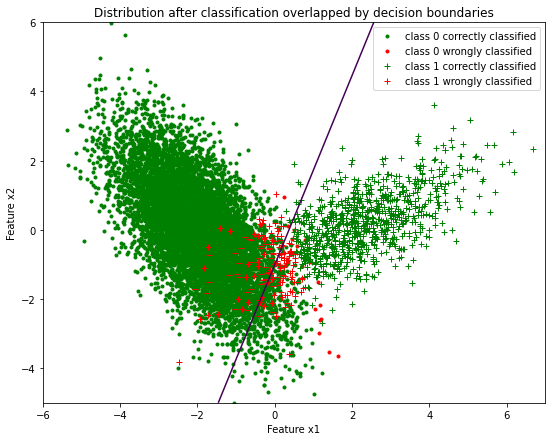

In [12]:
# # Generate the data
features = 2

# mean vectors
mean = np.zeros((2,2))
mean[:,0] = [-2,0]
mean[:,1] = [2,0]

# Covariance matrix
cov = np.zeros((2,2,2))
cov[:,:,0] = [[1, -0.9],[-0.9,2]]
cov[:,:,1] = [[2, 0.9],[0.9, 1]]

# Priors
prior = [0.9, 0.1]

np.random.seed(12)
D_train10,labels_10 = Generate_and_Plot_data(10)
D_train100,labels_100 = Generate_and_Plot_data(100)
D_train1000,labels_1000 = Generate_and_Plot_data(1000)
D_test10000,labels_10000 = Generate_and_Plot_data(10000)

roc_plt(D_test10000,labels_10000,10000)

w_10,decisions_10 = find_theta(D_train10,0.01,2000,labels_10,D_test10000, type_='l')
w_100,decisions_100 = find_theta(D_train100,0.05,2000,labels_100,D_test10000, type_= 'l')
w_1000, decisions_1000 = find_theta(D_train1000,0.05,2000,labels_1000,D_test10000, type_='l')

# Code to get error
for decisions in [decisions_10,decisions_100,decisions_1000]:
	x00 = [i for i in range(10000) if (labels_10000[0,i] == 0 and decisions[0,i] == 0)]
	x11 = [i for i in range(10000) if (labels_10000[0,i] == 1 and decisions[0,i] == 1)]
	print(100 - ((len(x00)+len(x11))/100.0))

plot_boundary(np.vstack((labels_10000[0,:],decisions_1000)))